In [1]:
#### ALL NOTEBOOK SHOULD HAVE SOME VERSION OF THIS #####################################
########################################################################################
%load_ext autoreload
%autoreload 2
import os
import sys

currentdir = os.getcwd()
# go to root directory. change the # of os.path.dirnames based on where currentdir is
parentdir = os.path.dirname(os.path.dirname(currentdir)) 
# chek where I'm at. if I go too far up the tree, go back
if 'Protein-Purification-Model-Public' not in parentdir: parentdir = currentdir
if parentdir not in sys.path: sys.path.insert(0,parentdir)
########################################################################################

In [2]:
import utils
import simple_data_vis as vis
import dab_nn_defs as engine
#import kerastuner as kt
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# load data from just-private/data
parentdir="."
filename1 = 'mol_res_scan_results_7.csv'
data1 = utils.load_data(parentdir,filename1)

filename2 = 'mol_res_scan_results_7_langmuir.csv'
data2 = utils.load_data(parentdir,filename2)

# since currently data is just one big dataframe, select model inputs as X and purity, yield as Y
# should be the same for both datasets
x = [*data1.columns[:2],*data1.columns[4:]]
y = data1.columns[2:4]

In [4]:
data1

,cut 1,cut 2,yield,purity,c_s,v,mol1_D_L,mol1_k_ov,mol1_q_max,mol1_K_eq,mol1_z_p,mol1_n,mol1_K_s,mol2_D_L,mol2_k_ov,mol2_q_max,mol2_K_eq,mol2_z_p,mol2_n,mol2_K_s
0,0.0,3.0,0.242987,0.601903,0.2,0.576042,0.059,0.542,38.723139,819.315013,2.798520,0,0,0.059,0.542,24.871645,13.137022,2.49598,0,0
1,0.0,6.0,0.340549,0.610753,0.2,0.576042,0.059,0.542,38.723139,819.315013,2.798520,0,0,0.059,0.542,24.871645,13.137022,2.49598,0,0
2,0.0,9.0,0.401249,0.629828,0.2,0.576042,0.059,0.542,38.723139,819.315013,2.798520,0,0,0.059,0.542,24.871645,13.137022,2.49598,0,0
3,0.0,12.0,0.450786,0.647608,0.2,0.576042,0.059,0.542,38.723139,819.315013,2.798520,0,0,0.059,0.542,24.871645,13.137022,2.49598,0,0
4,0.0,15.0,0.493797,0.663042,0.2,0.576042,0.059,0.542,38.723139,819.315013,2.798520,0,0,0.059,0.542,24.871645,13.137022,2.49598,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,21.0,27.0,0.235513,0.827324,0.2,0.585693,0.059,0.542,22.245609,525.594367,3.914992,0,0,0.059,0.542,32.927813,743.144044,2.86039,0,0
16496,21.0,30.0,0.319632,0.825500,0.2,0.585693,0.059,0.542,22.245609,525.594367,3.914992,0,0,0.059,0.542,32.927813,743.144044,2.86039,0,0
16497,24.0,27.0,0.118564,0.825447,0.2,0.585693,0.059,0.542,22.245609,525.594367,3.914992,0,0,0.059,0.542,32.927813,743.144044,2.86039,0,0
16498,24.0,30.0,0.214339,0.823677,0.2,0.585693,0.059,0.542,22.245609,525.594367,3.914992,0,0,0.059,0.542,32.927813,743.144044,2.86039,0,0


In [5]:
data2

,cut 1,cut 2,yield,purity,c_s,v,mol1_D_L,mol1_k_ov,mol1_q_max,mol1_K_eq,mol1_z_p,mol1_n,mol1_K_s,mol2_D_L,mol2_k_ov,mol2_q_max,mol2_K_eq,mol2_z_p,mol2_n,mol2_K_s
0,0.0,3.0,0.086373,0.891044,0.2,0.229752,0.059,0.542,48.204949,350.956198,3.872501,0,0,0.059,0.542,40.752658,744.917510,2.793961,0,0
1,0.0,6.0,0.216279,0.909183,0.2,0.229752,0.059,0.542,48.204949,350.956198,3.872501,0,0,0.059,0.542,40.752658,744.917510,2.793961,0,0
2,0.0,9.0,0.318992,0.907419,0.2,0.229752,0.059,0.542,48.204949,350.956198,3.872501,0,0,0.059,0.542,40.752658,744.917510,2.793961,0,0
3,0.0,12.0,0.390825,0.900357,0.2,0.229752,0.059,0.542,48.204949,350.956198,3.872501,0,0,0.059,0.542,40.752658,744.917510,2.793961,0,0
4,0.0,15.0,0.439860,0.891756,0.2,0.229752,0.059,0.542,48.204949,350.956198,3.872501,0,0,0.059,0.542,40.752658,744.917510,2.793961,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,21.0,27.0,0.267223,0.797186,0.2,0.772969,0.059,0.542,12.876538,293.448400,3.041961,0,0,0.059,0.542,9.364693,211.841698,2.863234,0,0
16496,21.0,30.0,0.362445,0.797594,0.2,0.772969,0.059,0.542,12.876538,293.448400,3.041961,0,0,0.059,0.542,9.364693,211.841698,2.863234,0,0
16497,24.0,27.0,0.134425,0.797679,0.2,0.772969,0.059,0.542,12.876538,293.448400,3.041961,0,0,0.059,0.542,9.364693,211.841698,2.863234,0,0
16498,24.0,30.0,0.242926,0.798041,0.2,0.772969,0.059,0.542,12.876538,293.448400,3.041961,0,0,0.059,0.542,9.364693,211.841698,2.863234,0,0


In [6]:
def data_pipeline(array, x, y):
    splits = []
    for a in array:
        a = utils.preprocessing([a,], bounds = {'yield':[0,1],'purity':[0,1]})[0]
        train_x, test_x, train_y, test_y = utils.chroma_train_test_split(a, x, y)
        train_x, test_x, scaler_x = utils.preprocessing(
                                    [train_x, test_x], 
                                    standarize = True, 
                                    skip = ['cut 1','cut 2']
                                    )
        splits.append([train_x, train_y])
        splits.append([test_x, test_y])

    return splits

In [7]:
train1, test1, train2, test2 = data_pipeline([data1,data2],x,y)
# could add this bit to data_pipeline
trains = [train1, train2]
tests = [test1, test2]

In [8]:
# define models to test out. a loop makes sense too 
def generate_models(filenames):
    models = []
    for filename in filenames:
        dlr = engine.create_deterministic_linear_regressor(
            FEATURE_NAMES = x,
            TARGET_NAMES = y,
            name = 'DLR_'+filename[:-4]
        )

        plr = engine.create_probabilistic_linear_regressor(
            FEATURE_NAMES = x,
            TARGET_NAMES = y,
            name = 'PLR_'+filename[:-4],
        )

        dnn = engine.create_deterministic_nn(
            FEATURE_NAMES = x,
            TARGET_NAMES = y,
            hidden_units = [16,8,4],
            name = 'DNN_'+filename[:-4]
        )

        pnn = engine.create_probabilistic_nn(
            FEATURE_NAMES = x,
            TARGET_NAMES = y,
            hidden_units = [16,8,4,],
            name = 'PNN_'+filename[:-4],
        )

        models.append([dlr,plr,dnn,pnn])
    return models

all_models = generate_models([filename1,filename2])

In [9]:
loss_weights = (1/trains[1][1].mean().div(trains[1][1].mean().max())).round(2).to_dict() 

In [11]:
loss_weights

{'yield': 1.88, 'purity': 1.0}

In [10]:
# train all the models under the same conditions
learning_rate = 0.01
epochs = 100
optimizer = 'Adam' # change manually or come up with dictionary?
losses = ['mean_squared_error', engine.negative_loglikelihood]*2
loss_weights = (1/trains[0][1].mean().div(trains[0][1].mean().max())).round(2).to_dict() 
histories = {}

for models, train, test, filename in zip(all_models, trains, tests, [filename1,filename2]):
    for m,l in zip(models,losses):
        histories[utils.get_model_name(m,filename)] = engine.run_experiment(
            model = m, 
            loss = {y[0]:l,y[1]:l},
            loss_weights = loss_weights,
            optimizer = tf.keras.optimizers.Adam,
            learning_rate = learning_rate,
            num_epochs = epochs,
            train_dataset = train, 
            test_dataset = test,
            verbose = 0,
            log = 0
            )

settings = {'learning_rate' : learning_rate,
            'epochs' : epochs,
            'optimizer': optimizer,
            'loss_weights': loss_weights,
            'dataset' : filename1+'\n'+filename2}

Start training the model DLR_mol_res_scan_results_7 ...


KeyboardInterrupt: 

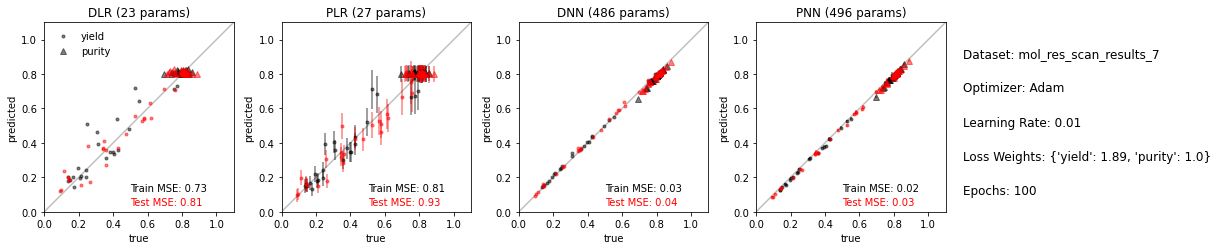

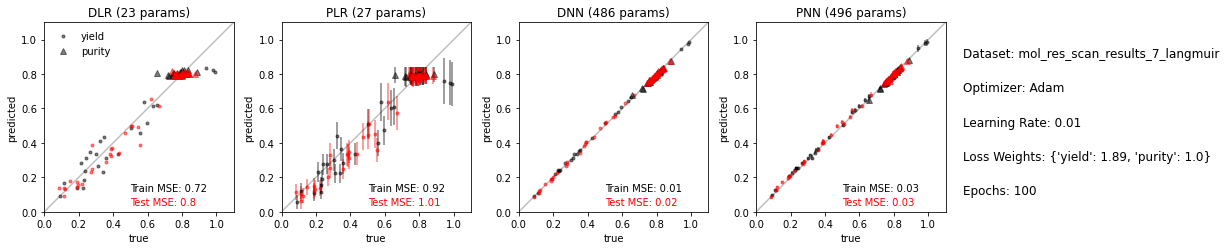

In [10]:
# check model predictions
settings['dataset'] = filename1
vis.scatter_hats(all_models[0], trains[0], tests[0], settings, N = 25)
settings['dataset'] = filename2
vis.scatter_hats(all_models[1], trains[1], tests[1], settings, N = 25)

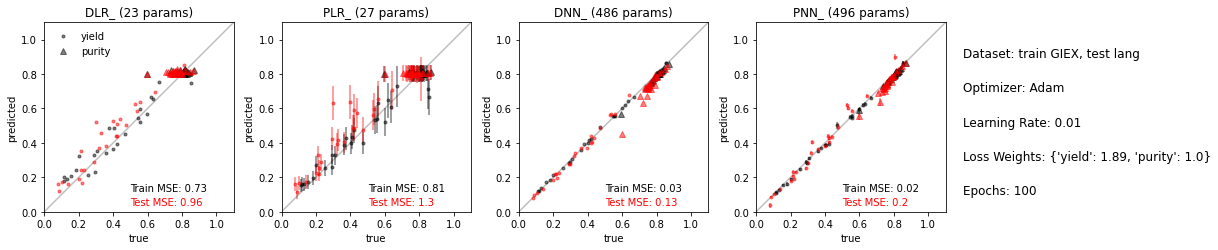

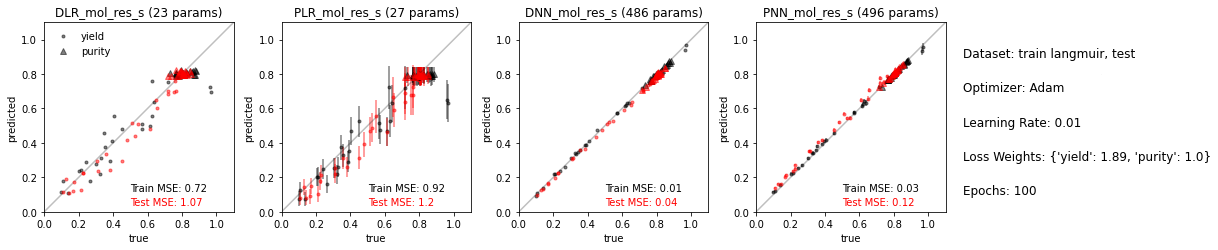

In [12]:
settings['dataset'] = 'train GIEX, test langmuir'
vis.scatter_hats(all_models[0], trains[0], tests[1], settings, N = 25)
settings['dataset'] = 'train langmuir, test GIEX'
vis.scatter_hats(all_models[1], trains[1], tests[0], settings, N = 25)

In [13]:
data2.index = data2.index + len(data1)
all_data = data1.append(data2)

In [14]:
all_train, all_test = data_pipeline([all_data,],x,y)

In [15]:
ra_models = generate_models(['isotherm',])[0]

In [16]:
# this is why we make functions...

learning_rate = 0.005
epochs = 100
optimizer = 'Adam' # change manually or come up with dictionary?
losses = ['mean_squared_error', engine.negative_loglikelihood]*2
loss_weights = (1/all_train[1].mean().div(all_train[1].mean().max())).round(2).to_dict() 
histories = {}

for m,l in zip(ra_models,losses):
    histories[utils.get_model_name(m,'S+Q')] = engine.run_experiment(
        model = m, 
        loss = {y[0]:l,y[1]:l},
        loss_weights = loss_weights,
        optimizer = tf.keras.optimizers.Adam,
        learning_rate = learning_rate,
        num_epochs = epochs,
        train_dataset = all_train, 
        test_dataset = all_test,
        verbose = 0,
        log = 0
        )

settings = {'learning_rate' : learning_rate,
            'epochs' : epochs,
            'optimizer': optimizer,
            'loss_weights': loss_weights,
            'dataset' : 'isotherm'}

Start training the model DLR_isot ...
Evaluating model performance...
Train MSE: 0.705
Test MSE: 0.743
Start training the model PLR_isot ...
Evaluating model performance...
Train MSE: 0.764
Test MSE: 0.832
Start training the model DNN_isot ...
Evaluating model performance...
Train MSE: 0.016
Test MSE: 0.017
Start training the model PNN_isot ...
Evaluating model performance...
Train MSE: 0.021
Test MSE: 0.022


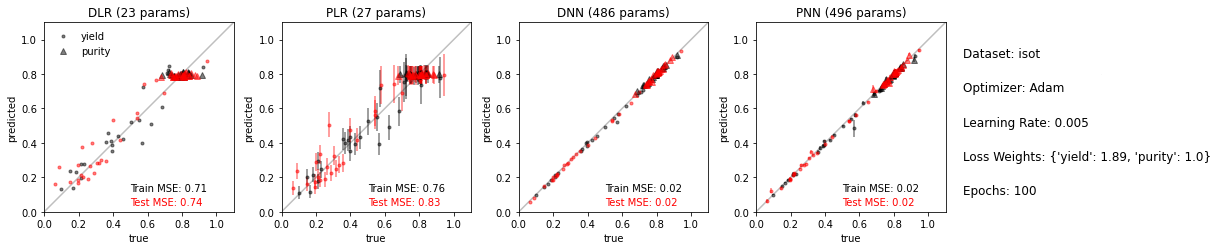

In [17]:
vis.scatter_hats(ra_models, all_train, all_test, settings, N = 25)